<a href="https://colab.research.google.com/github/onwuks/webscraping/blob/main/british_airways_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scraping and Analyzing Data for Birtish Airways (the Forage)

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

##The scrapping the data

In [ ]:
headers = []
IsVerifieds = []
aircrafts = []
traveler_types = []
seat_types = []
routes = []
date_flowns = []
# seat_comforts = []
reviews = []
recommended = []
the_others = []


pages = range(1,379)
for i in pages:
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}'
    site = requests.get(url).content
    soup = BeautifulSoup(site, 'html.parser')
    section = soup.findAll('div', class_='body')
    # articles = section.find_all('article')
    for article in section:
        #get the header
        header =article.find('h2', class_='text_header')
        if header is not None:
            header = header.text
        else:
            header = 'blank'
        headers.append(header)
        #get the verified
        IsVerified = article.find('em')
        if IsVerified is not None:
            IsVerified = IsVerified.text
        else:
            IsVerified = 'blank'
        IsVerifieds.append (IsVerified)
        tr = article.findAll('td')
        review = article.find('div', class_="text_content")
        if review is not None:
          review = review
        else:
          review = 'blank'
        reviews.append(review.text)
        # try:
        aircraft = tr[1].text
        if aircraft is not None:
            aircraft = aircraft
        else:
            aircraft = 'blank'
        aircrafts.append(aircraft)
        traveler_type = tr[3].text
        if traveler_type is not None:
            traveler_type = traveler_type
        else:
            traveler_type = 'blank'
        traveler_types.append(traveler_type)
        seat_type = tr[5].text
        if seat_type is not None:
            seat_type = seat_type
        else:
            seat_type = 'blank'
        seat_types.append(seat_type)
        try:
          route = tr[7].text
          if route is not None:
              route = route
          else:
              route = 'blank'
        except:
          route ='blank'
        routes.append(route)
        try:
          date_flown = tr[9].text
          if date_flown is not None:
              date_flown = date_flown
          else:
              date_flown = 'blank'
        except:
          date_flown = 'blank'
        date_flowns.append(date_flown)
        # # seat_comfort = len(tr[11].findAll(class_='star fill'))
        # # if seat_comfort is not None:
        # #     seat_comfort = seat_comfort
        # else:
        #     seat_comfort= 'blank'
        # seat_comforts.append(seat_comfort)
        recommend = tr[-1].text
        if recommend is not None:
          recommend = recommend
        else:
          recommend = 'blank'
        recommended.append(recommend)
        others = tr
        if others is not None:
          others =  others
        else:
          others = 'blank'
        the_others.append(others)


        # except:
        #     pass

## check the length of each scrapped data

In [ ]:
my_cols= [headers,
IsVerifieds,
aircrafts,
traveler_types ,
seat_types,
routes,
date_flowns,
# seat_comforts,
recommended,
reviews,
the_others]

In [ ]:
for cols in my_cols:
    print(len(cols))

3780
3780
3780
3780
3780
3780
3780
3780
3780
3780


## create a dictionary with the list containng the scrapped data

In [ ]:
table_dict = {'headers':headers,
    'IsVerifieds':IsVerifieds,
    'aircrafts':aircrafts,
    'traveler_types':traveler_types,
    'seat_types':seat_types,
    'routes':routes,
    'date_flowns':date_flowns,
    # 'seat_comforts':seat_comforts,
    'recommended':recommended,
    'reviews':reviews,
    'others':the_others}

## covert the dictionary to a pandas dataframe

In [ ]:
df=pd.DataFrame(table_dict)

In [ ]:
#export the data excel
df.to_csv('british_airways_data.csv')

In [ ]:
df

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others
0,"""The flights were okay""",Trip Verified,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,no,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller..."
1,“entire experience has been stressful”,Trip Verified,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,12345,no,✅ Trip Verified | The entire booking and ticke...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty..."
2,"""whole experience was awful""",Not Verified,Family Leisure,Economy Class,Tenerife to London,January 2024,12345,no,Not Verified | British Airways cancelled my ...,"[[Type Of Traveller], [Family Leisure], [Seat ..."
3,“This is true service”,Not Verified,A340,Business,Business Class,Lisbon to San Diego,March 2024,yes,Not Verified | I wanted to write this review s...,"[[Aircraft], [A340], [Type Of Traveller], [Bus..."
4,"""Flight attendants welcoming""",Trip Verified,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,yes,✅ Trip Verified | Check in fast and friendly....,"[[Aircraft], [Boeing 787], [Type Of Traveller]..."
...,...,...,...,...,...,...,...,...,...,...
3775,British Airways customer review,blank,Economy Class,12345,12345,12345,12345,no,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,"[[Seat Type], [Economy Class], [Seat Comfort],..."
3776,British Airways customer review,blank,Economy Class,12345,12345,12345,12345,no,Just got back from Bridgetown Barbados flying ...,"[[Seat Type], [Economy Class], [Seat Comfort],..."
3777,British Airways customer review,blank,Economy Class,12345,12345,12345,12345,no,LHR-JFK-LAX-LHR. Check in was ok apart from be...,"[[Seat Type], [Economy Class], [Seat Comfort],..."
3778,British Airways customer review,blank,Business Class,12345,12345,12345,12345,yes,HKG-LHR in New Club World on Boeing 777-300 - ...,"[[Seat Type], [Business Class], [Seat Comfort]..."


##considering only the verified customer reviews

In [ ]:
df_verified = df[df['IsVerifieds']=='Trip Verified']

In [ ]:
df_verified.describe()

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others
count,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213
unique,1193,1,113,9,387,581,77,2,1213,1213
top,British Airways customer review,Trip Verified,Solo Leisure,Economy Class,Economy Class,March 2018,12345,no,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller..."
freq,8,1213,166,331,311,18,472,793,1,1


In [ ]:
df_verified.tail()

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others
1464,"""bus transfer and arrival at 2.30am""",Trip Verified,Solo Leisure,Economy Class,London Gatwick to Verona,October 2017,12345,no,✅ Trip Verified | After 3 hour delay at airpor...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty..."
1465,"""Short-haul with BA never again""",Trip Verified,Business,Economy Class,Madrid to London Heathrow,September 2017,12345,no,✅ Trip Verified | Flew British Airways from Ma...,"[[Type Of Traveller], [Business], [Seat Type],..."
1466,"""solid product and excellent crew""",Trip Verified,Boeing 777-200,Solo Leisure,First Class,Tel Aviv to London,November 2017,yes,✅ Trip Verified | Tel Aviv to London. We arri...,"[[Aircraft], [Boeing 777-200], [Type Of Travel..."
1467,"""was a very enjoyable flight""",Trip Verified,Boeing 777-200,Solo Leisure,Business Class,London to Tel Aviv,November 2017,yes,✅ Trip Verified | London to Tel Aviv. Arrived...,"[[Aircraft], [Boeing 777-200], [Type Of Travel..."
1468,"""The service was brusque""",Trip Verified,Boeing 787,Family Leisure,Economy Class,Kuala Lumpur to Madrid via London,November 2017,yes,✅ Trip Verified | Kuala Lumpur to Madrid via ...,"[[Aircraft], [Boeing 787], [Type Of Traveller]..."


## Write and test a function to process the 'others' column into an inner data frame

In [ ]:
test = df['others']

In [ ]:
type(test.iloc[0])

bs4.element.ResultSet

In [ ]:
data = test.iloc[56]

In [ ]:
def table_rating(data):
  rating = []
  rating_value = []
  length = len(data)
  items = list(range(0,length))
  for item in items:
    if item % 2 != 0:
      value = data[item]
      if len(value.findAll('span', class_='star fill')) == 0:
        value = value.text
      else:
        value = len(value.findAll('span', class_='star fill'))
      rating_value.append(value)
    elif item % 2 == 0:
     rating.append(data[item].text)
  data_dict = {'rating':rating, "rating_value":rating_value}
  data_ratings = pd.DataFrame(data_dict)
  data_ratings.set_index('rating', drop=True, inplace=True)
  return data_ratings


In [ ]:
d = table_rating(data = test.iloc[22])
d


,rating_value
rating,
Aircraft,Boeing 777-300ER
Type Of Traveller,Solo Leisure
Seat Type,First Class
Route,Los Angeles to London
Date Flown,March 2024
Seat Comfort,2
Cabin Staff Service,1
Food & Beverages,1
Ground Service,3


In [ ]:
d.loc['Date Flown', 'rating_value']

'January 2024'

In [ ]:
#apply the function to the df_verified table
df_verified['other_data'] = df_verified['others'].apply(lambda data: table_rating(data))

<ipython-input-217-1835cc7bc4bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['other_data'] = df_verified['others'].apply(lambda data: table_rating(data))


In [ ]:
df_verified

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others,other_data
0,"""The flights were okay""",Trip Verified,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,no,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller...",rating_value ...
1,“entire experience has been stressful”,Trip Verified,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,12345,no,✅ Trip Verified | The entire booking and ticke...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty...",rat...
4,"""Flight attendants welcoming""",Trip Verified,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,yes,✅ Trip Verified | Check in fast and friendly....,"[[Aircraft], [Boeing 787], [Type Of Traveller]...",rating_va...
5,"""the service was appalling""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | This is the first time I ha...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...
6,"""service was slow and unfriendly""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | Flew business class from Do...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...
...,...,...,...,...,...,...,...,...,...,...,...
1464,"""bus transfer and arrival at 2.30am""",Trip Verified,Solo Leisure,Economy Class,London Gatwick to Verona,October 2017,12345,no,✅ Trip Verified | After 3 hour delay at airpor...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty...",rating_value ...
1465,"""Short-haul with BA never again""",Trip Verified,Business,Economy Class,Madrid to London Heathrow,September 2017,12345,no,✅ Trip Verified | Flew British Airways from Ma...,"[[Type Of Traveller], [Business], [Seat Type],...",rating_value...
1466,"""solid product and excellent crew""",Trip Verified,Boeing 777-200,Solo Leisure,First Class,Tel Aviv to London,November 2017,yes,✅ Trip Verified | Tel Aviv to London. We arri...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_value rat...
1467,"""was a very enjoyable flight""",Trip Verified,Boeing 777-200,Solo Leisure,Business Class,London to Tel Aviv,November 2017,yes,✅ Trip Verified | London to Tel Aviv. Arrived...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_value rat...


##Processing the star ratings into columns

In [ ]:
test2 = df_verified['other_data'][1]

In [ ]:
test3 = df_verified.head(30)

In [ ]:
def route_add(x):
  try:
    dx = x.loc['Route','rating_value']
  except:
    dx = 'blank'
  return dx

In [ ]:
df_verified['Route'] = df_verified['other_data'].apply(lambda x: route_add(x))

<ipython-input-303-d4ed6fbca643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['Route'] = df_verified['other_data'].apply(lambda x: route_add(x))


In [ ]:
df_verified.head()

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others,other_data,Route
0,"""The flights were okay""",Trip Verified,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,no,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller...",rating_value ...,Rotterdam to London City
1,“entire experience has been stressful”,Trip Verified,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,12345,no,✅ Trip Verified | The entire booking and ticke...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty...",rat...,Kansas City to Dublin via Heathrow
4,"""Flight attendants welcoming""",Trip Verified,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,yes,✅ Trip Verified | Check in fast and friendly....,"[[Aircraft], [Boeing 787], [Type Of Traveller]...",rating_va...,London Heathrow to Mumbai
5,"""the service was appalling""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | This is the first time I ha...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...,Doha to London Heathrow
6,"""service was slow and unfriendly""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | Flew business class from Do...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...,Doha to London Heathrow


In [ ]:
my_index = ['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended']

In [ ]:
#automatic generate functins to create columns
for i in my_index:
  print(f"def {i}_add(x):")
  print("\ttry:")
  print(f'\t\tdx = x.loc["{i}","rating_value"]')
  print("\texcept:")
  print("\t\tdx = 'blank'")
  print("\treturn dx")
  print('\n')
  print('\n')

def Aircraft_add(x):
	try:
		dx = x.loc["Aircraft","rating_value"]
	except:
		dx = 'blank'
	return dx




def Type Of Traveller_add(x):
	try:
		dx = x.loc["Type Of Traveller","rating_value"]
	except:
		dx = 'blank'
	return dx




def Seat Type_add(x):
	try:
		dx = x.loc["Seat Type","rating_value"]
	except:
		dx = 'blank'
	return dx




def Route_add(x):
	try:
		dx = x.loc["Route","rating_value"]
	except:
		dx = 'blank'
	return dx




def Date Flown_add(x):
	try:
		dx = x.loc["Date Flown","rating_value"]
	except:
		dx = 'blank'
	return dx




def Seat Comfort_add(x):
	try:
		dx = x.loc["Seat Comfort","rating_value"]
	except:
		dx = 'blank'
	return dx




def Cabin Staff Service_add(x):
	try:
		dx = x.loc["Cabin Staff Service","rating_value"]
	except:
		dx = 'blank'
	return dx




def Food & Beverages_add(x):
	try:
		dx = x.loc["Food & Beverages","rating_value"]
	except:
		dx = 'blank'
	return dx




def Ground Service_add(x):
	try:
		dx = x.loc["Ground Service","rating_value"]
	except:


In [ ]:
def Aircraft_add(x):
	try:
		dx = x.loc["Aircraft","rating_value"]
	except:
		dx = 0
	return dx




def Type_traveller_add(x):
	try:
		dx = x.loc["Type Of Traveller","rating_value"]
	except:
		dx = 0
	return dx




def Seat_Type_add(x):
	try:
		dx = x.loc["Seat Type","rating_value"]
	except:
		dx = 0
	return dx




def Route_add(x):
	try:
		dx = x.loc["Route","rating_value"]
	except:
		dx = 0
	return dx




def Date_Flown_add(x):
	try:
		dx = x.loc["Date Flown","rating_value"]
	except:
		dx = 0
	return dx




def Seat_Comfort_add(x):
	try:
		dx = x.loc["Seat Comfort","rating_value"]
	except:
		dx = 0
	return dx




def Cabin_Service_add(x):
	try:
		dx = x.loc["Cabin Staff Service","rating_value"]
	except:
		dx = 0
	return dx




def Food_Beverages_add(x):
	try:
		dx = x.loc["Food & Beverages","rating_value"]
	except:
		dx = 0
	return dx




def Ground_Service_add(x):
	try:
		dx = x.loc["Ground Service","rating_value"]
	except:
		dx = 0
	return dx




def Wifi_Connectivity_add(x):
	try:
		dx = x.loc["Wifi & Connectivity","rating_value"]
	except:
		dx = 0
	return dx




def Value_Money_add(x):
	try:
		dx = x.loc["Value For Money","rating_value"]
	except:
		dx = 0
	return dx




def Recommended_add(x):
	try:
		dx = x.loc["Recommended","rating_value"]
	except:
		dx = 'blank'
	return dx


In [ ]:
my_functions = ['Aircraft_add', 'Type_traveller_add', 'Seat_Type_add', 'Route_add', 'Date_Flown_add',
       'Seat_Comfort_add', 'Cabin_Service_add', 'Food_Beverages_add',
       'Ground_Service_add', 'Wifi_Connectivity_add', 'Value_Money_add',
       'Recommended_add']

def Aircraft_add(x):
def Type_traveller_add(x):
def Seat_Type_add(x):
def Route_add(x):
def Date_Flown_add(x):
def Seat_Comfort_add(x):
def Cabin_Service_add(x):
def Food_Beverages_add(x):
def Ground_Service_add(x):
def Wifi_Connectivity_add(x):
def Value_Money_add(x):
def Recommended_add(x):


In [ ]:
for i in my_functions:
  print(f"df_verified['{i}'] = df_verified['other_data'].apply(lambda x: {i}(x))")


df_verified['Aircraft_add'] = df_verified['other_data'].apply(lambda x: Aircraft_add(x))
df_verified['Type_traveller_add'] = df_verified['other_data'].apply(lambda x: Type_traveller_add(x))
df_verified['Seat_Type_add'] = df_verified['other_data'].apply(lambda x: Seat_Type_add(x))
df_verified['Route_add'] = df_verified['other_data'].apply(lambda x: Route_add(x))
df_verified['Date_Flown_add'] = df_verified['other_data'].apply(lambda x: Date_Flown_add(x))
df_verified['Seat_Comfort_add'] = df_verified['other_data'].apply(lambda x: Seat_Comfort_add(x))
df_verified['Cabin_Service_add'] = df_verified['other_data'].apply(lambda x: Cabin_Service_add(x))
df_verified['Food_Beverages_add'] = df_verified['other_data'].apply(lambda x: Food_Beverages_add(x))
df_verified['Ground_Service_add'] = df_verified['other_data'].apply(lambda x: Ground_Service_add(x))
df_verified['Wifi_Connectivity_add'] = df_verified['other_data'].apply(lambda x: Wifi_Connectivity_add(x))
df_verified['Value_Money_add'] = df_ve

In [ ]:
df_verified['Aircraft_add'] = df_verified['other_data'].apply(lambda x: Aircraft_add(x))
df_verified['Type_traveller_add'] = df_verified['other_data'].apply(lambda x: Type_traveller_add(x))
df_verified['Seat_Type_add'] = df_verified['other_data'].apply(lambda x: Seat_Type_add(x))
df_verified['Route_add'] = df_verified['other_data'].apply(lambda x: Route_add(x))
df_verified['Date_Flown_add'] = df_verified['other_data'].apply(lambda x: Date_Flown_add(x))
df_verified['Seat_Comfort_add'] = df_verified['other_data'].apply(lambda x: Seat_Comfort_add(x))
df_verified['Cabin_Service_add'] = df_verified['other_data'].apply(lambda x: Cabin_Service_add(x))
df_verified['Food_Beverages_add'] = df_verified['other_data'].apply(lambda x: Food_Beverages_add(x))
df_verified['Ground_Service_add'] = df_verified['other_data'].apply(lambda x: Ground_Service_add(x))
df_verified['Wifi_Connectivity_add'] = df_verified['other_data'].apply(lambda x: Wifi_Connectivity_add(x))
df_verified['Value_Money_add'] = df_verified['other_data'].apply(lambda x: Value_Money_add(x))
df_verified['Recommended_add'] = df_verified['other_data'].apply(lambda x: Recommended_add(x))

<ipython-input-308-5779595f1e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['Aircraft_add'] = df_verified['other_data'].apply(lambda x: Aircraft_add(x))
<ipython-input-308-5779595f1e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['Type_traveller_add'] = df_verified['other_data'].apply(lambda x: Type_traveller_add(x))
<ipython-input-308-5779595f1e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [ ]:
df_verified.head()

,headers,IsVerifieds,aircrafts,traveler_types,seat_types,routes,date_flowns,recommended,reviews,others,...,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add
0,"""The flights were okay""",Trip Verified,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,no,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller...",...,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,blank,2,no
1,“entire experience has been stressful”,Trip Verified,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,12345,no,✅ Trip Verified | The entire booking and ticke...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty...",...,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,blank,3,blank,1,no
4,"""Flight attendants welcoming""",Trip Verified,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,yes,✅ Trip Verified | Check in fast and friendly....,"[[Aircraft], [Boeing 787], [Type Of Traveller]...",...,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,blank,3,yes
5,"""the service was appalling""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | This is the first time I ha...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",...,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no
6,"""service was slow and unfriendly""",Trip Verified,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,no,✅ Trip Verified | Flew business class from Do...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",...,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no


## Drop all unneeded columns with messy data

In [ ]:
df_verified.columns

Index(['headers', 'IsVerifieds', 'aircrafts', 'traveler_types', 'seat_types',
       'routes', 'date_flowns', 'recommended', 'reviews', 'others',
       'other_data', 'Route', 'Aircraft_add', 'Type_traveller_add',
       'Seat_Type_add', 'Route_add', 'Date_Flown_add', 'Seat_Comfort_add',
       'Cabin_Service_add', 'Food_Beverages_add', 'Ground_Service_add',
       'Wifi_Connectivity_add', 'Value_Money_add', 'Recommended_add'],
      dtype='object')

In [ ]:
df_verified.drop(columns=['aircrafts', 'traveler_types', 'seat_types','routes', 'date_flowns', 'recommended'], inplace=True)

In [ ]:
df_verified.head()

,headers,IsVerifieds,reviews,others,other_data,Route,Aircraft_add,Type_traveller_add,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add
0,"""The flights were okay""",Trip Verified,✅ Trip Verified | We chose Rotterdam and Lond...,"[[Aircraft], [A319 / E190], [Type Of Traveller...",rating_value ...,Rotterdam to London City,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,blank,2,no
1,“entire experience has been stressful”,Trip Verified,✅ Trip Verified | The entire booking and ticke...,"[[Type Of Traveller], [Solo Leisure], [Seat Ty...",rat...,Kansas City to Dublin via Heathrow,blank,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,blank,3,blank,1,no
4,"""Flight attendants welcoming""",Trip Verified,✅ Trip Verified | Check in fast and friendly....,"[[Aircraft], [Boeing 787], [Type Of Traveller]...",rating_va...,London Heathrow to Mumbai,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,blank,3,yes
5,"""the service was appalling""",Trip Verified,✅ Trip Verified | This is the first time I ha...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no
6,"""service was slow and unfriendly""",Trip Verified,✅ Trip Verified | Flew business class from Do...,"[[Aircraft], [Boeing 777-200], [Type Of Travel...",rating_valu...,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no


In [ ]:
df_verified['reviews_adds'] = df_verified['reviews'].str.split('|').str.get(1)

<ipython-input-314-6f2ae017e189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['reviews_adds'] = df_verified['reviews'].str.split('|').str.get(1)


In [ ]:
df_verified.head()

,headers,IsVerifieds,Route,Aircraft_add,Type_traveller_add,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add,reviews_adds
0,"""The flights were okay""",Trip Verified,Rotterdam to London City,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,blank,2,no,We chose Rotterdam and London City airport b...
1,“entire experience has been stressful”,Trip Verified,Kansas City to Dublin via Heathrow,blank,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,blank,3,blank,1,no,The entire booking and ticketing experience h...
4,"""Flight attendants welcoming""",Trip Verified,London Heathrow to Mumbai,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,blank,3,yes,Check in fast and friendly. Security a breez...
5,"""the service was appalling""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no,This is the first time I have seen the new C...
6,"""service was slow and unfriendly""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no,Flew business class from Doha to London on 3...


In [ ]:
df_verified.drop(columns=['reviews', 'others','other_data'], inplace=True)

<ipython-input-317-0ab54d74e7fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified.drop(columns=['reviews', 'others','other_data'], inplace=True)


In [ ]:
df_verified_processed = df_verified.to_csv('df_verified_processed.csv')

## Wordcloud to determine the most commented words on the header and reviews

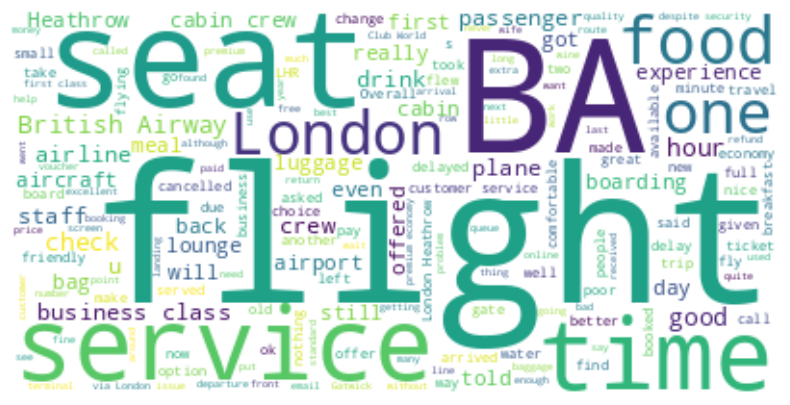

In [ ]:
### Word Cloud of mostly used word
text = " ".join(word for word in df_verified.reviews_adds)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### show the wordcloud image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

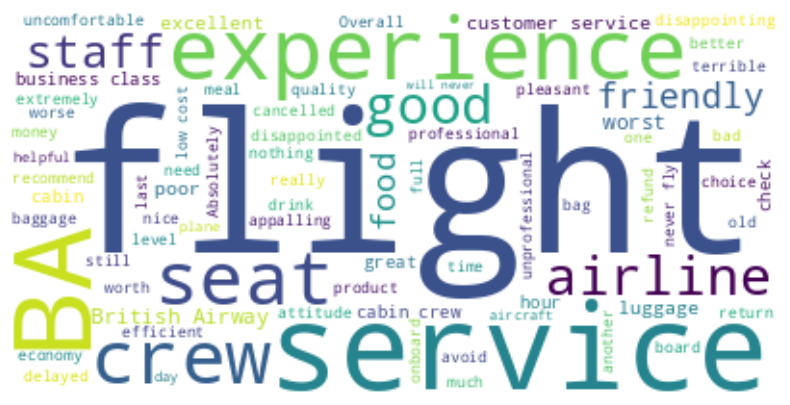

In [ ]:
### Word Cloud of mostly used word
text = " ".join(word for word in df_verified.headers)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### show the wordcloud image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*From the wordcloud, The passengers are mostly concerned with seat comfort, service time, crew/staff conduct and food, most of all, the staff seems friendly.*


## Adding Sentiment Analysis using TextBlob

In [ ]:
def analyze(text):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  if polarity > 0:
    sentiment = "positive"
  elif polarity < 0:
    sentiment = "negative"
  else:
    sentiment = "neutral"
  return sentiment


In [ ]:
df_verified['sentiment'] = df_verified['reviews_adds'].apply(lambda text: analyze(text))

<ipython-input-349-32459d57feac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['sentiment'] = df_verified['reviews_adds'].apply(lambda text: analyze(text))


In [ ]:
df_verified.head()

,headers,IsVerifieds,Route,Aircraft_add,Type_traveller_add,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add,reviews_adds,sentiment
0,"""The flights were okay""",Trip Verified,Rotterdam to London City,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,blank,2,no,We chose Rotterdam and London City airport b...,positive
1,“entire experience has been stressful”,Trip Verified,Kansas City to Dublin via Heathrow,blank,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,blank,3,blank,1,no,The entire booking and ticketing experience h...,negative
4,"""Flight attendants welcoming""",Trip Verified,London Heathrow to Mumbai,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,blank,3,yes,Check in fast and friendly. Security a breez...,positive
5,"""the service was appalling""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no,This is the first time I have seen the new C...,positive
6,"""service was slow and unfriendly""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no,Flew business class from Doha to London on 3...,negative


In [ ]:
sentiment= df_verified['sentiment'].value_counts()

In [ ]:
sentiment

sentiment
positive    780
negative    421
neutral      12
Name: count, dtype: int64

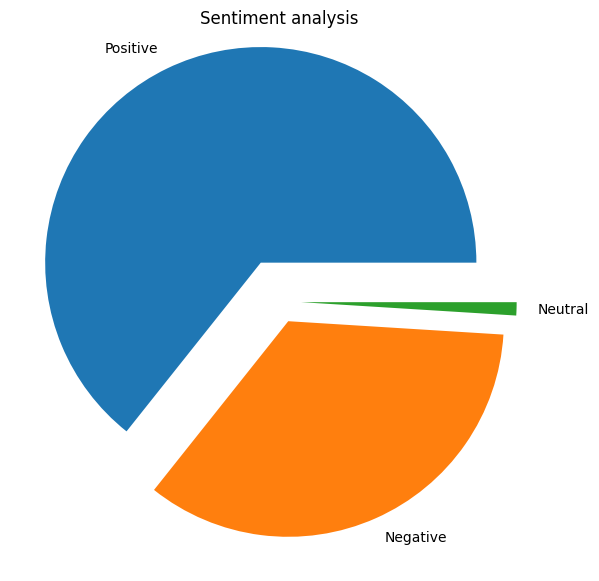

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
plt.figure(figsize=(7,7))
plt.pie(sentiment, labels=labels, explode=(0.2,0.1,0.1));
plt.title("Sentiment analysis");

*From the sentiment analysis, we had more positive reviews 64% than negative 35%, however this is not reflected on recommendation, as we had more ‘no’ than ‘yes’*


In [ ]:
recommendation  =  df_verified['Recommended_add'].value_counts(normalize=True)

In [ ]:
recommendation

Recommended_add
no     0.653751
yes    0.346249
Name: proportion, dtype: float64

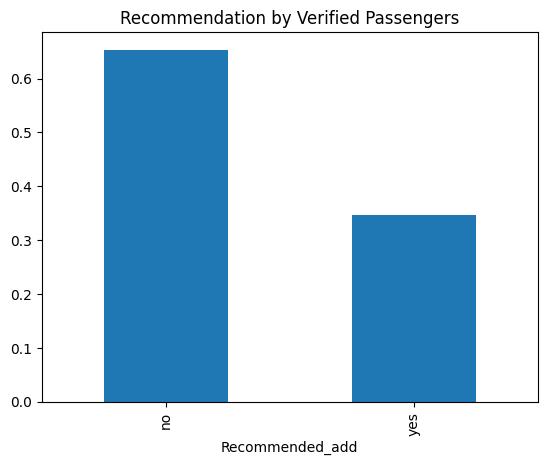

In [ ]:
recommendation.plot(kind='bar', title='Recommendation by Verified Passengers');

In [ ]:
#exported the data to csv, changed all the blank to 0 and loaded it again
df_load = pd.read_csv('df_verified_processed_0.csv')

In [ ]:
df_load.head()

,Unnamed: 0,headers,IsVerifieds,Route,Aircraft_add,Type_traveller_add,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add,reviews_adds,sentiment
0,0,"""The flights were okay""",Trip Verified,Rotterdam to London City,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,0,2,no,We chose Rotterdam and London City airport b...,positive
1,1,“entire experience has been stressful”,Trip Verified,Kansas City to Dublin via Heathrow,0,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,0,3,0,1,no,The entire booking and ticketing experience h...,negative
2,4,"""Flight attendants welcoming""",Trip Verified,London Heathrow to Mumbai,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,0,3,yes,Check in fast and friendly. Security a breez...,positive
3,5,"""the service was appalling""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no,This is the first time I have seen the new C...,positive
4,6,"""service was slow and unfriendly""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no,Flew business class from Doha to London on 3...,negative


## Adding Averaging rating of all the stars for analysis

In [ ]:
df_verified['averaging_stars'] = (df_load['Seat_Comfort_add']+ df_load['Cabin_Service_add']+ df_load['Food_Beverages_add']+df_load['Ground_Service_add']+df_load['Wifi_Connectivity_add']+df_load['Value_Money_add'])/6

<ipython-input-415-11c9eefe3aee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['averaging_stars'] = (df_load['Seat_Comfort_add']+ df_load['Cabin_Service_add']+ df_load['Food_Beverages_add']+df_load['Ground_Service_add']+df_load['Wifi_Connectivity_add']+df_load['Value_Money_add'])/6


In [ ]:
df_verified.head()


,headers,IsVerifieds,Route,Aircraft_add,Type_traveller_add,Seat_Type_add,Route_add,Date_Flown_add,Seat_Comfort_add,Cabin_Service_add,Food_Beverages_add,Ground_Service_add,Wifi_Connectivity_add,Value_Money_add,Recommended_add,reviews_adds,sentiment,average_rating,averaging_stars
0,"""The flights were okay""",Trip Verified,Rotterdam to London City,A319 / E190,Couple Leisure,Economy Class,Rotterdam to London City,March 2024,3,3,3,3,blank,2,no,We chose Rotterdam and London City airport b...,positive,NaN,2.333333
1,“entire experience has been stressful”,Trip Verified,Kansas City to Dublin via Heathrow,blank,Solo Leisure,Premium Economy,Kansas City to Dublin via Heathrow,April 2024,2,3,blank,3,blank,1,no,The entire booking and ticketing experience h...,negative,NaN,1.500000
4,"""Flight attendants welcoming""",Trip Verified,London Heathrow to Mumbai,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3,5,3,4,blank,3,yes,Check in fast and friendly. Security a breez...,positive,NaN,2.666667
5,"""the service was appalling""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3,1,1,2,1,1,no,This is the first time I have seen the new C...,positive,NaN,3.500000
6,"""service was slow and unfriendly""",Trip Verified,Doha to London Heathrow,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5,1,1,5,1,3,no,Flew business class from Doha to London on 3...,negative,NaN,3.166667


In [ ]:
Aircraft_pivot_table = df_verified.pivot_table(values='averaging_stars', index='Aircraft_add', aggfunc=np.mean)

In [ ]:
Aircraft_pivot_table

,averaging_stars
Aircraft_add,
777,2.083333
777-300 and A320,3.500000
A230,3.666667
A319,2.450000
A319 / Boeing 747,2.500000
...,...
Embraer,1.888889
Embraer 190,2.833333
Embraer 195,1.833333


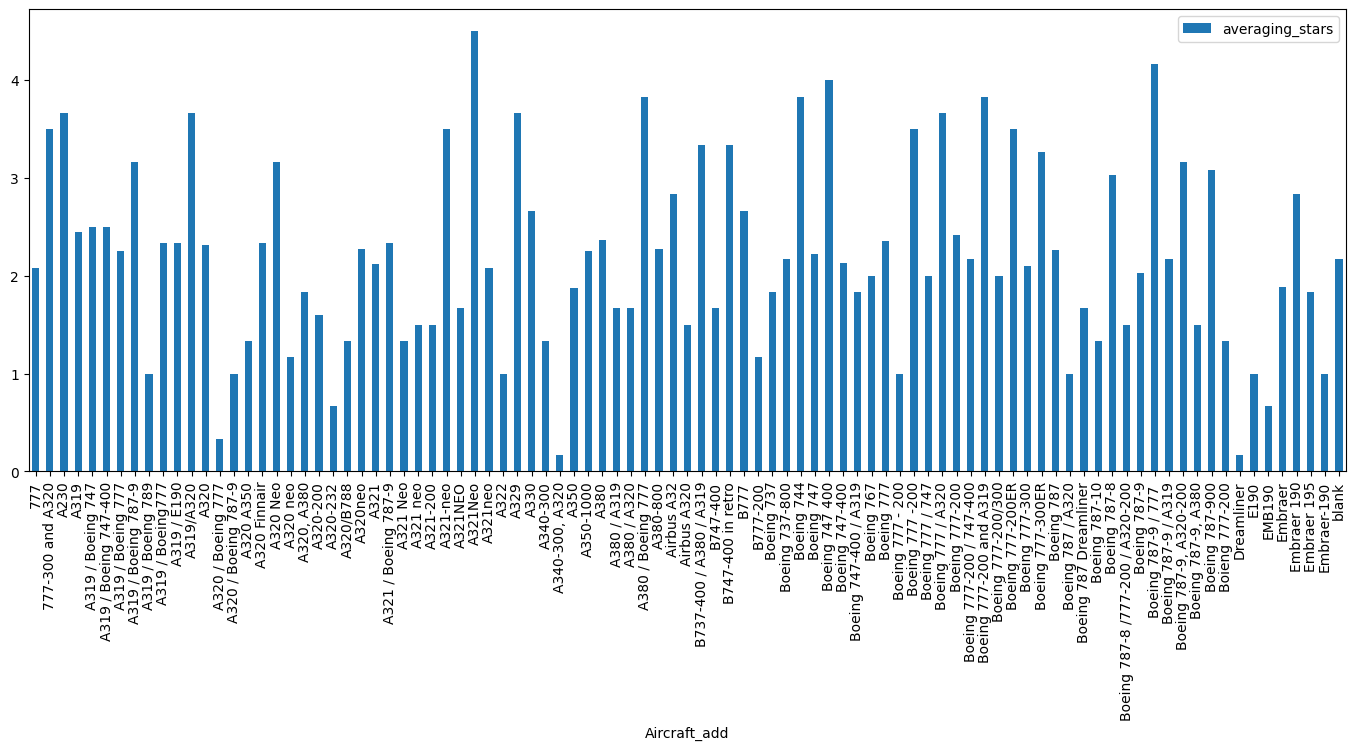

In [ ]:
fig, ax1 = plt.subplots(figsize=(17,6))
Aircraft_pivot_table.plot(kind='bar', ax=ax1)
plt.show();

*The Dreamliner, A340-300-A320 and A320/Boeing777 has the worst average rating less than 1*

In [ ]:
pd.to_datetime(df_verified['Date_Flown_add']).sort_values(ascending=False)

<ipython-input-447-b2ca79e2cbaa>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_verified['Date_Flown_add']).sort_values(ascending=False)


1      2024-04-01
0      2024-03-01
15     2024-03-01
26     2024-03-01
23     2024-03-01
          ...    
1426   2017-07-01
1367   2017-07-01
1434   2017-06-01
1442   2017-06-01
1412   2017-03-01
Name: Date_Flown_add, Length: 1213, dtype: datetime64[ns]

In [ ]:
service_progess =df_verified.pivot_table(values='averaging_stars', index=pd.to_datetime(df_verified['Date_Flown_add']), aggfunc=np.mean)

<ipython-input-448-c50c051b6548>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  service_progess =df_verified.pivot_table(values='averaging_stars', index=pd.to_datetime(df_verified['Date_Flown_add']), aggfunc=np.mean)


In [ ]:
service_progess

,averaging_stars
Date_Flown_add,
2018-01-01,2.166667
2018-02-01,1.166667
2018-03-01,3.000000
2018-04-01,1.583333
2018-06-01,2.208333
...,...
2023-12-01,2.031250
2024-01-01,2.583333
2024-02-01,2.357143


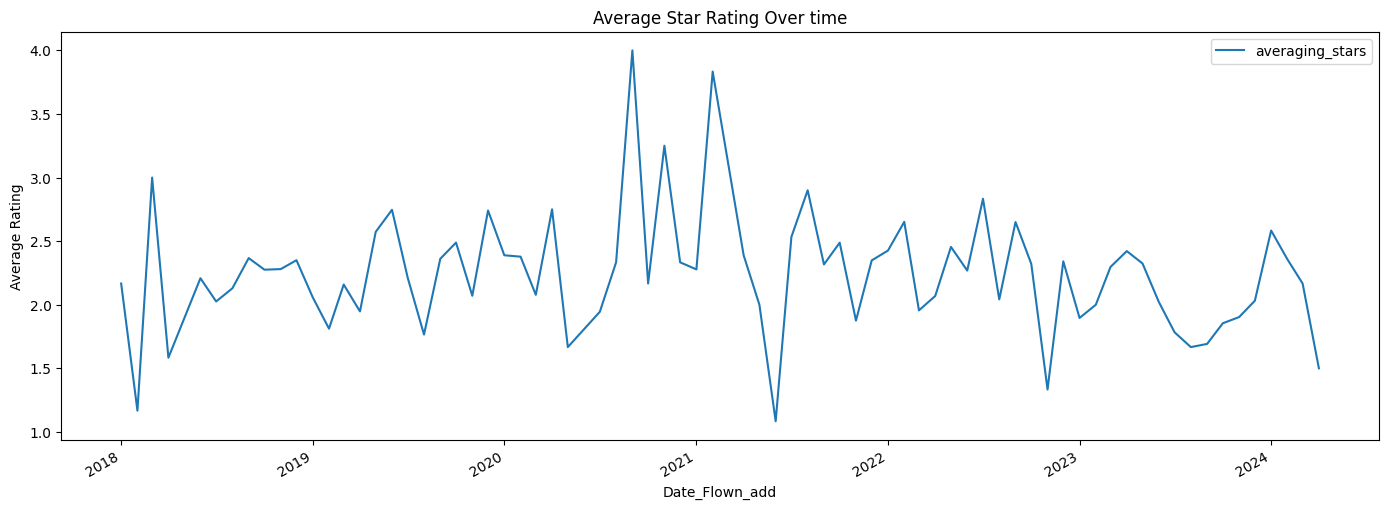

In [ ]:
fig, ax1 = plt.subplots(figsize=(17,6))
service_progess.plot(kind='line', ax=ax1, title='Average Star Rating Over time', ylabel = 'Average Rating')
plt.show();

*BA had their best rating late 2020 and early 2021, but currently average rating is about 2.5*

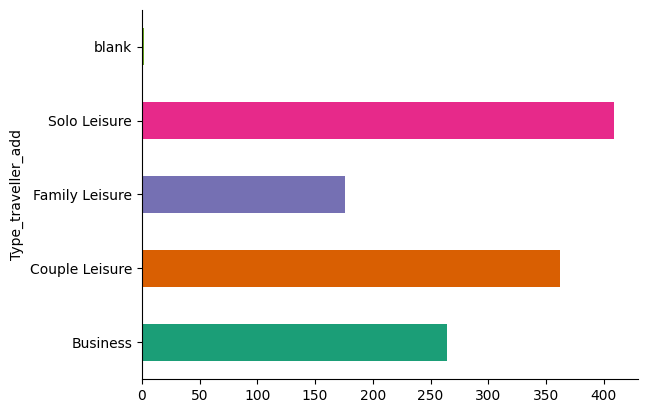

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_verified.groupby('Type_traveller_add').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

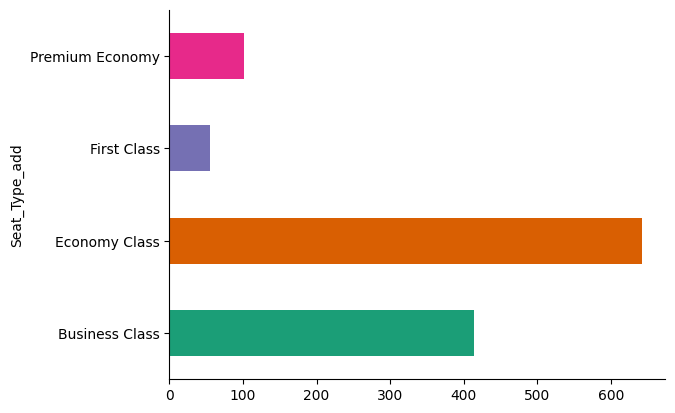

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_verified.groupby('Seat_Type_add').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_load = pd.read_csv('/content/sample_data/df_verified_processed_0.csv')

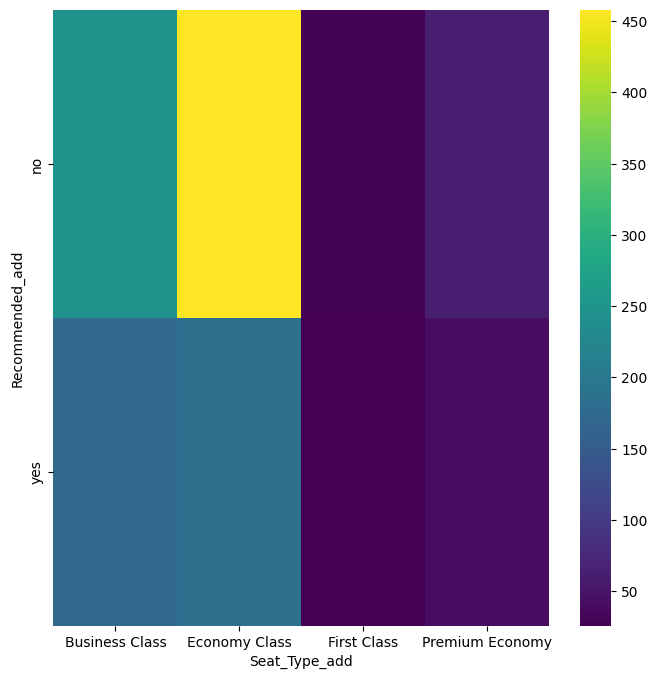

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recommended_add'].value_counts()
    for x_label, grp in df_load.groupby('Seat_Type_add')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Seat_Type_add')
_ = plt.ylabel('Recommended_add')

*Most passengers flying Economy do not recommend BA, they need to improve  economy class services and seat comformt, because they are bulk of their passengers*